In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')

import warnings
warnings.filterwarnings("ignore")

In [2]:
raw_data = pd.read_csv('AB_NYC_2019.csv')
raw_data.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355


This data file includes all needed information to find out more about hosts, geographical availability, necessary metrics to make predictions and draw conclusions.

Field| Type| Description
:-----|:-----|:-----
id|integer|Airbnb's unique identifier for the listing
name|string|		
host_id|integer|		
host_name|string|		
neighbourhood_group|text|The neighbourhood group as geocoded using the latitude and longitude against neighborhoods as defined by open or public digital shapefiles.
neighbourhood|text|The neighbourhood as geocoded using the latitude and longitude against neighborhoods as defined by open or public digital shapefiles.
latitude|numeric|Uses the World Geodetic System (WGS84) projection for latitude and longitude.
longitude||Uses the World Geodetic System (WGS84) projection for latitude and longitude.
room_type|string|	
price|currency|daily price in local currency. Note, $ sign may be used despite locale
minimum_nights|integer|minimum number of night stay for the listing (calendar rules may be different)
number_of_reviews|integer|The number of reviews the listing has
last_review|date|The date of the last/newest review
reviews_per_month|numeric|The number of reviews the listing has over the lifetime of the listing
calculated_host_listings_count|integer|The number of listings the host has in the current scrape, in the city/region geography.
availability_365|integer|avaliability_x. The availability of the listing x days in the future as determined by the calendar. Note a listing may be available because it has been booked by a guest or blocked by the host.

id | integer | Airbnb's unique identifier for the listing



### EDA

In [3]:
raw_data.shape

(48895, 16)

In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
raw_data.nunique()

id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

### EDA

Очистим все признаки с уникальными (или почти) значениями.

In [6]:
column_to_drop = ['id', 'name', 'host_id', 'host_name']

In [7]:
data = raw_data.drop(column_to_drop, axis=1)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   neighbourhood                   48895 non-null  object 
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   room_type                       48895 non-null  object 
 5   price                           48895 non-null  int64  
 6   minimum_nights                  48895 non-null  int64  
 7   number_of_reviews               48895 non-null  int64  
 8   last_review                     38843 non-null  object 
 9   reviews_per_month               38843 non-null  float64
 10  calculated_host_listings_count  48895 non-null  int64  
 11  availability_365                48895 non-null  int64  
dtypes: float64(3), int64(5), object(

Видим, что признаки last_review и reviews_per_month у порядка 20% записей содержат пустые значения. Попробуем выяснить причины этого и что-то с этим сделать.

In [9]:
data[data['last_review'].isnull()].head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
19,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190,7,0,NaN,NaN,2,249
26,Manhattan,Inwood,40.86754,-73.92639,Private room,80,4,0,NaN,NaN,1,0
36,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35,60,0,NaN,NaN,1,365
38,Brooklyn,Flatbush,40.63702,-73.96327,Private room,150,1,0,NaN,NaN,1,365


Можно предположить, что last_review и reviews_per_month пустые потому, что никто еще не оставлял отзывов. Но это нужно проверить.

In [10]:
print(f"Row count with reviews, but without last review: {data[data['last_review'].isnull() & data['number_of_reviews'] != 0].shape[0]}")

Row count with reviews, but without last review: 0


In [11]:
data[data['last_review'].isnull() & ~data['reviews_per_month'].isnull()].shape[0]

0

In [12]:
data[~data['last_review'].isnull() & data['reviews_per_month'].isnull()].shape[0]

0

Все верно, last_review и reviews_per_month пустые, потому что еще не было отзывов. reviews_per_month имеет значение NaN из-за деления количества отзывов за текущий месяц (0) на общее количество отзывов (0), поэтому можем заполнить столбец reviews_per_month значениям 0.0, что по факту будет являться правдой.

In [13]:
data['reviews_per_month'] = data['reviews_per_month'].fillna(0.0)

last_review со значениями NaN можно заменить на 1970-01-01, что в целом должно быть равнозначно максимально давно сделанному последнему отзыву.

In [14]:
data['last_review'] = data['last_review'].fillna("1970-01-01")

In [15]:
data.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


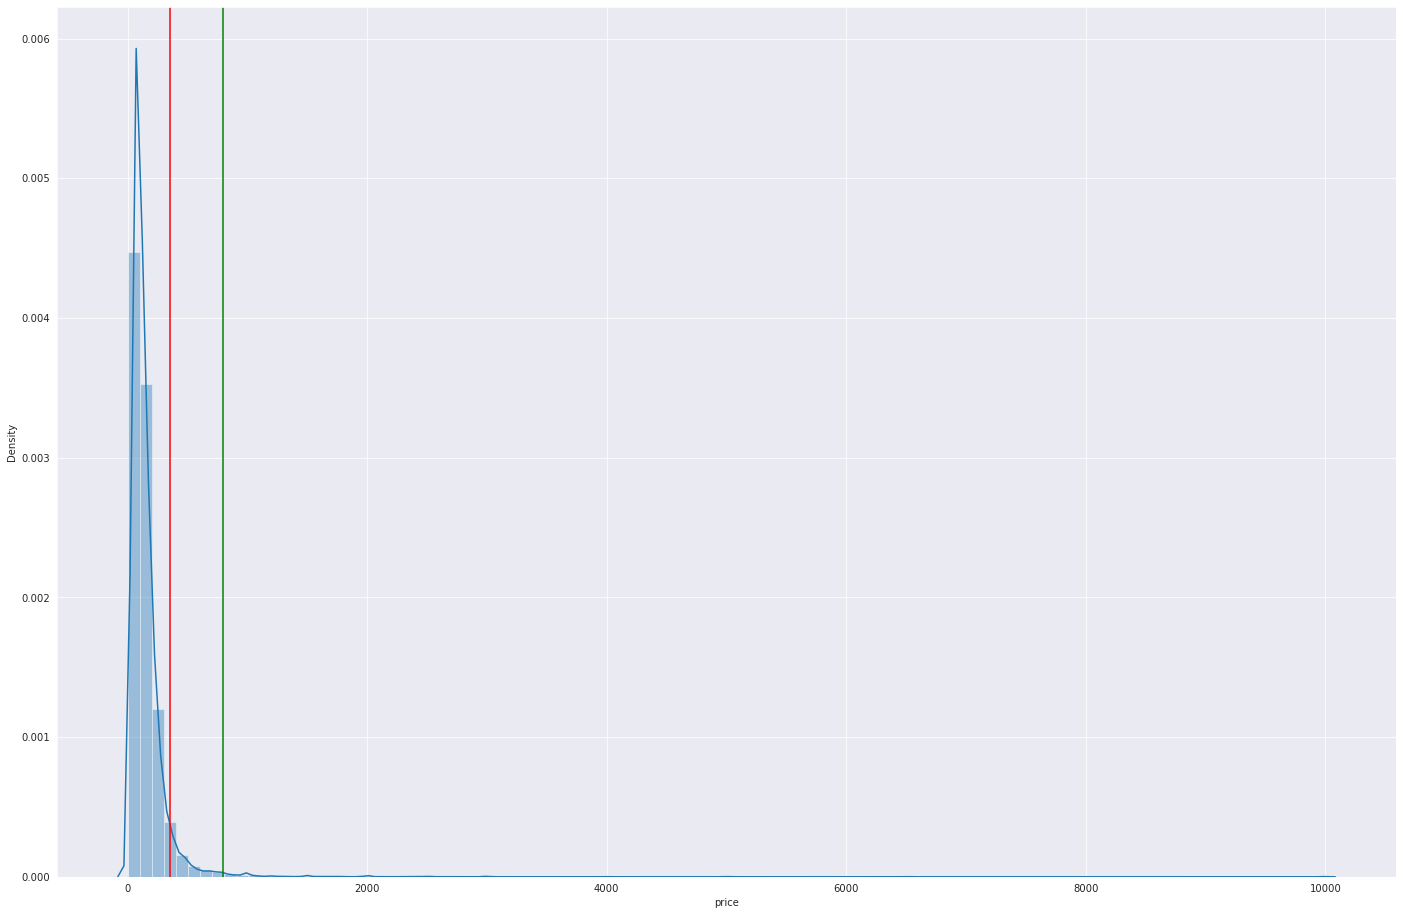

In [16]:
plt.subplots(figsize=(24,16))
sns.distplot(data['price'], bins=100)
plt.axvline(data['price'].quantile(0.95), label='95% quantile', c='red')
plt.axvline(data['price'].quantile(0.99), label='99% quantile', c='green')
plt.show()

In [17]:
data[data['price'] >= data['price'].quantile(0.99)].shape[0]

492

За 99 квантилем лежат достаточно сильные выбросы, которые в сумме составляют порядка 1% данных. Поэтому можно их убрать.

In [18]:
data = data.loc[data['price']<data['price'].quantile(0.99)]

In [19]:
data.shape

(48403, 12)

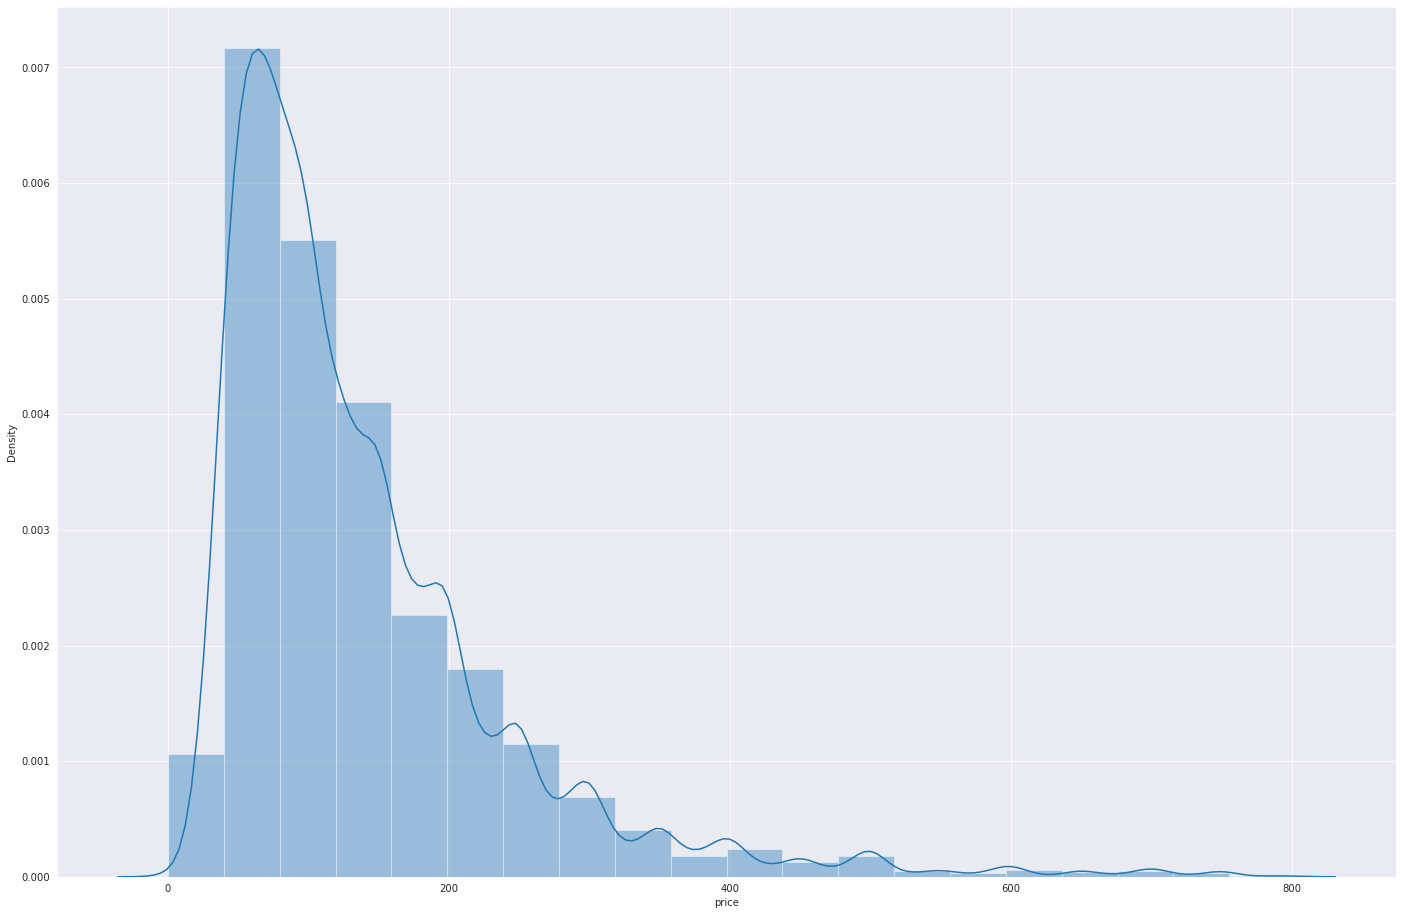

In [20]:
plt.subplots(figsize=(24,16))
sns.distplot(data['price'], bins=20)
plt.show()

Из графика видно, что распределение таргета не является нормальным, поэтому попробуем сделать его нормальным через логарифмирование.

In [21]:
data['log_price'] = np.log1p(data['price'])

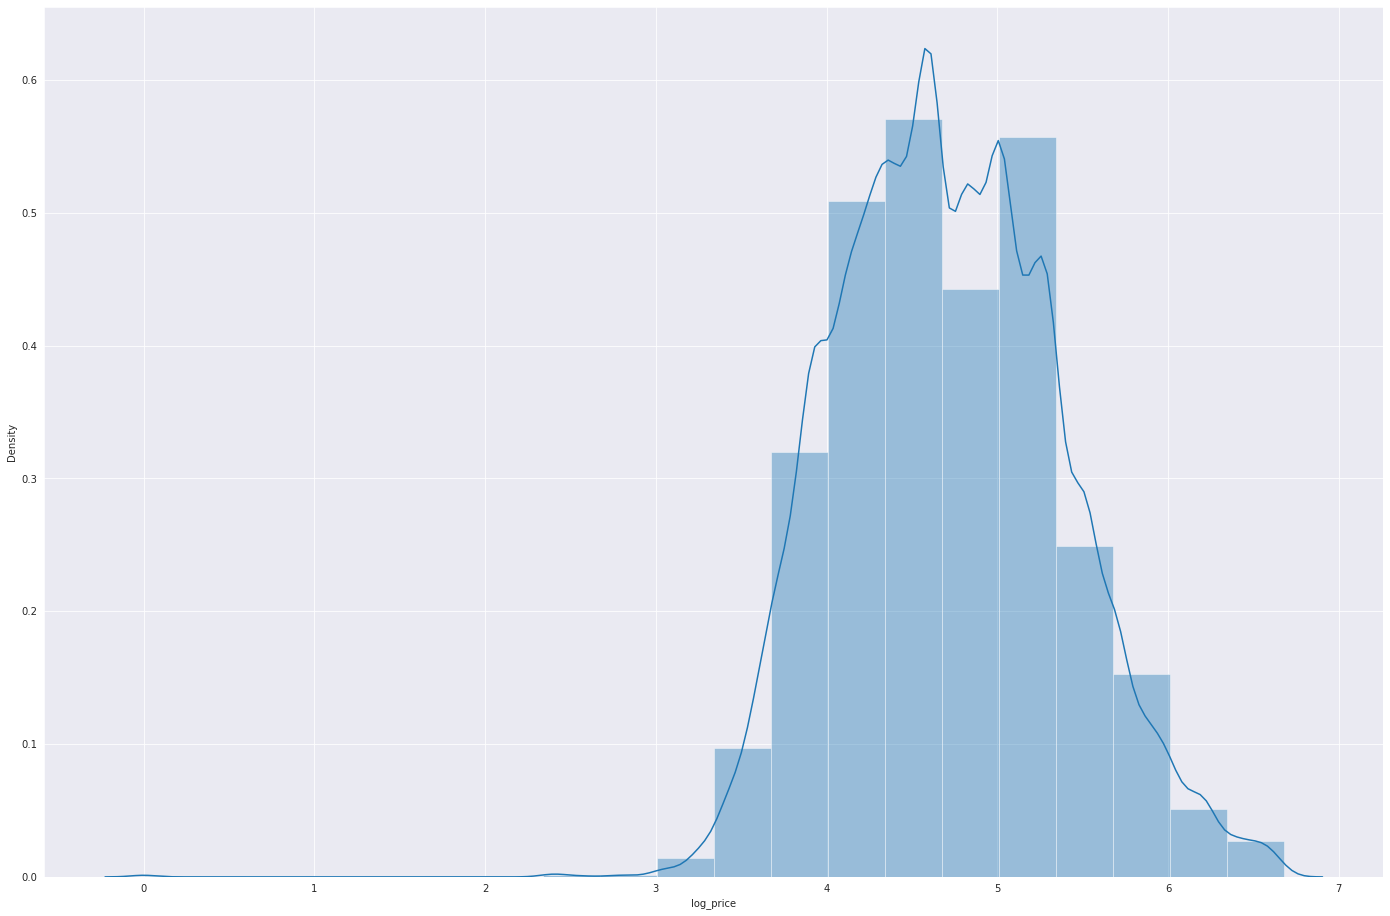

In [22]:
plt.subplots(figsize=(24,16))
sns.distplot(data['log_price'], bins=20)
plt.show()

Видно, что в данных имеются варианты с нулевой ценой, что является весьма странным. Такие записи тоже уберем.

In [23]:
data = data[data['price'] > 0]

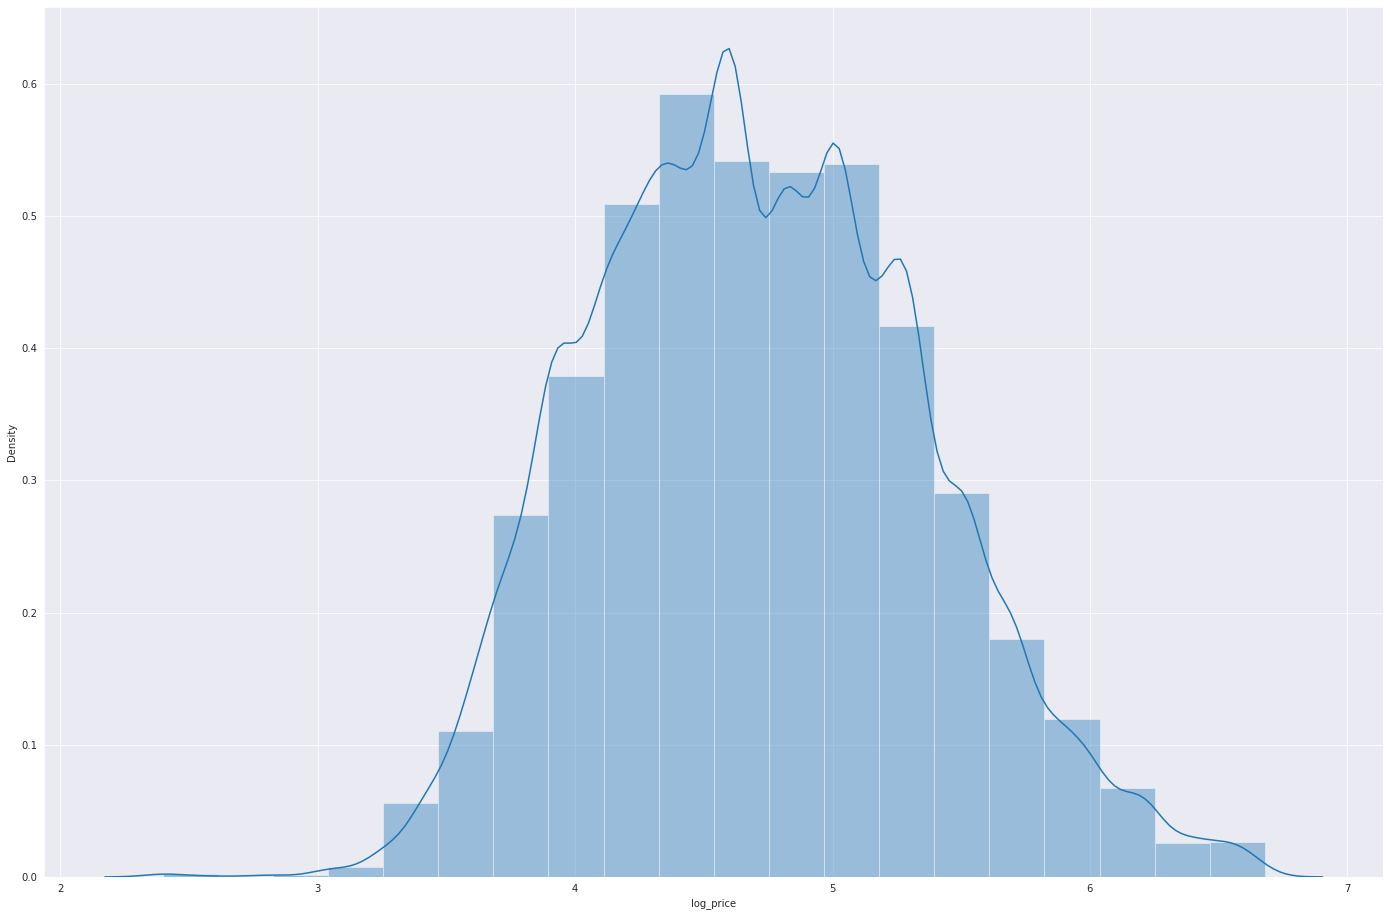

In [24]:
plt.subplots(figsize=(24,16))
sns.distplot(data['log_price'], bins=20)
plt.show()

Теперь распределение стало больше похоже на нормальное.

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48392 entries, 0 to 48894
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48392 non-null  object 
 1   neighbourhood                   48392 non-null  object 
 2   latitude                        48392 non-null  float64
 3   longitude                       48392 non-null  float64
 4   room_type                       48392 non-null  object 
 5   price                           48392 non-null  int64  
 6   minimum_nights                  48392 non-null  int64  
 7   number_of_reviews               48392 non-null  int64  
 8   last_review                     48392 non-null  object 
 9   reviews_per_month               48392 non-null  float64
 10  calculated_host_listings_count  48392 non-null  int64  
 11  availability_365                48392 non-null  int64  
 12  log_price                       

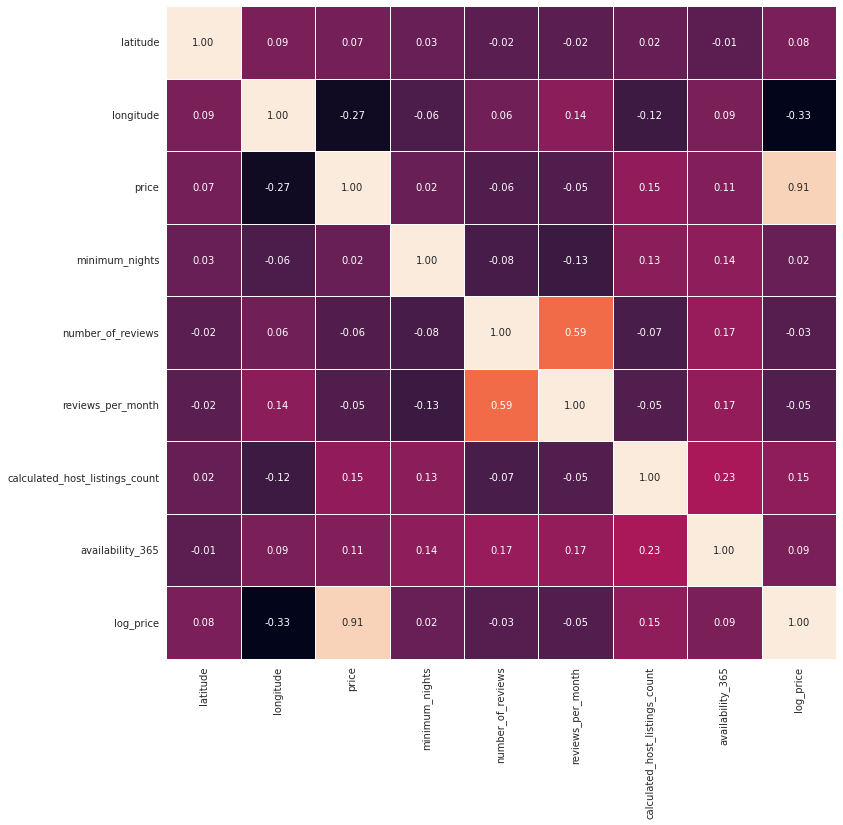

In [26]:
plt.figure(figsize=(12, 12))
sns.heatmap(data.corr(), annot=True, cbar=False, linewidths=.5, fmt= '.2f')
plt.show()

Как видно, числовые признаки не особо коррелируют с таргетом. Попробуем закодировать категориальные и посмотреть, как дела обстоят с ними.

Сделаем необходимые преобразования для категориальных признаков neighbourhood_group, neighbourhood, room_type. Начнем с room_type как наиболее простого варианта.

In [27]:
data['room_type'].value_counts()

Entire home/apt    25011
Private room       22230
Shared room         1151
Name: room_type, dtype: int64

In [28]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder_rt = OrdinalEncoder()

In [29]:
data[['room_type_numeric']] = ordinal_encoder_rt.fit_transform(data[['room_type']])

In [30]:
data['room_type_numeric'].corr(data['price'])

-0.5047007866964923

Теперь попробуем что-нибудь сделать с neighbourhood_group и neighbourhood.

In [31]:
data['neighbourhood_group'].value_counts()

Manhattan        21294
Brooklyn         19992
Queens            5650
Bronx             1087
Staten Island      369
Name: neighbourhood_group, dtype: int64

<AxesSubplot:xlabel='neighbourhood_group', ylabel='price'>

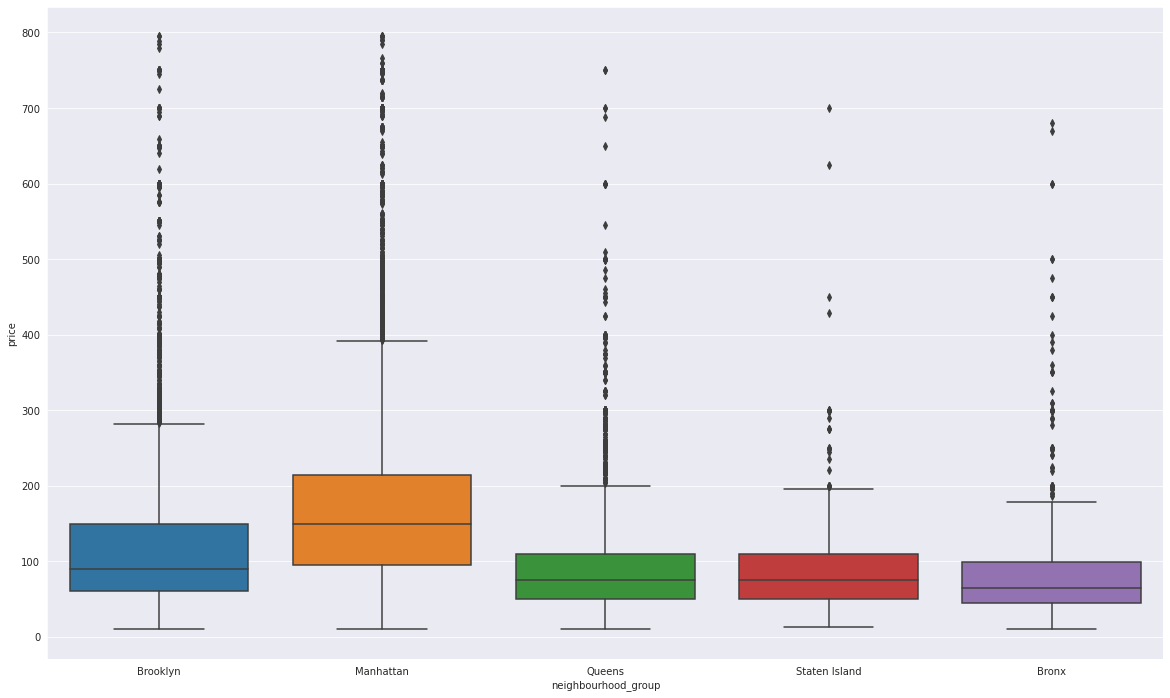

In [32]:
plt.figure(figsize=(20,12))
sns.boxplot(data=data, y='price', x='neighbourhood_group')

In [33]:
ordinal_encoder_nhg = OrdinalEncoder()
data[['neighbourhood_group_numeric']] = ordinal_encoder_nhg.fit_transform(data[['neighbourhood_group']])

In [34]:
data['neighbourhood_group_numeric'].corr(data['price'])

0.07295104355674688

Как видно, на Манхэттане и в Бруклине подавляющее число объявлений, а в Queens, Staten Island и Bronx распределения весьма похожи друг на друга. Корреляция с таргетом тоже очень низкая. Вероятнее всего по группе районов будет сложно определять цену. Посмотрим для групп районов распределения по районам.

In [35]:
ordinal_encoder_nh = OrdinalEncoder()
data[['neighbourhood_numeric']] = ordinal_encoder_nh.fit_transform(data[['neighbourhood']])

In [36]:
data['neighbourhood_numeric'].corr(data['price'])

0.116433224783422

In [37]:
nhg1_data = data[data['neighbourhood_group'] == 'Manhattan']
nhg2_data = data[data['neighbourhood_group'] == 'Brooklyn']
nhg3_data = data[data['neighbourhood_group'] == 'Queens']
nhg4_data = data[data['neighbourhood_group'] == 'Bronx']
nhg5_data = data[data['neighbourhood_group'] == 'Staten Island']

In [38]:
nhg1_data['neighbourhood'].value_counts()

Harlem                 2644
Hell's Kitchen         1935
Upper West Side        1928
East Village           1835
Upper East Side        1773
Midtown                1493
East Harlem            1113
Chelsea                1084
Lower East Side         904
Washington Heights      898
Financial District      738
West Village            738
Murray Hill             476
Kips Bay                462
Greenwich Village       379
Chinatown               365
Morningside Heights     345
SoHo                    336
Gramercy                329
Theater District        279
Inwood                  252
Nolita                  249
Tribeca                 155
Little Italy            119
NoHo                     77
Roosevelt Island         76
Flatiron District        74
Two Bridges              72
Battery Park City        67
Civic Center             51
Stuyvesant Town          36
Marble Hill              12
Name: neighbourhood, dtype: int64

Посмотрим на районы с наименьшим количеством объявлением.

<AxesSubplot:xlabel='neighbourhood', ylabel='log_price'>

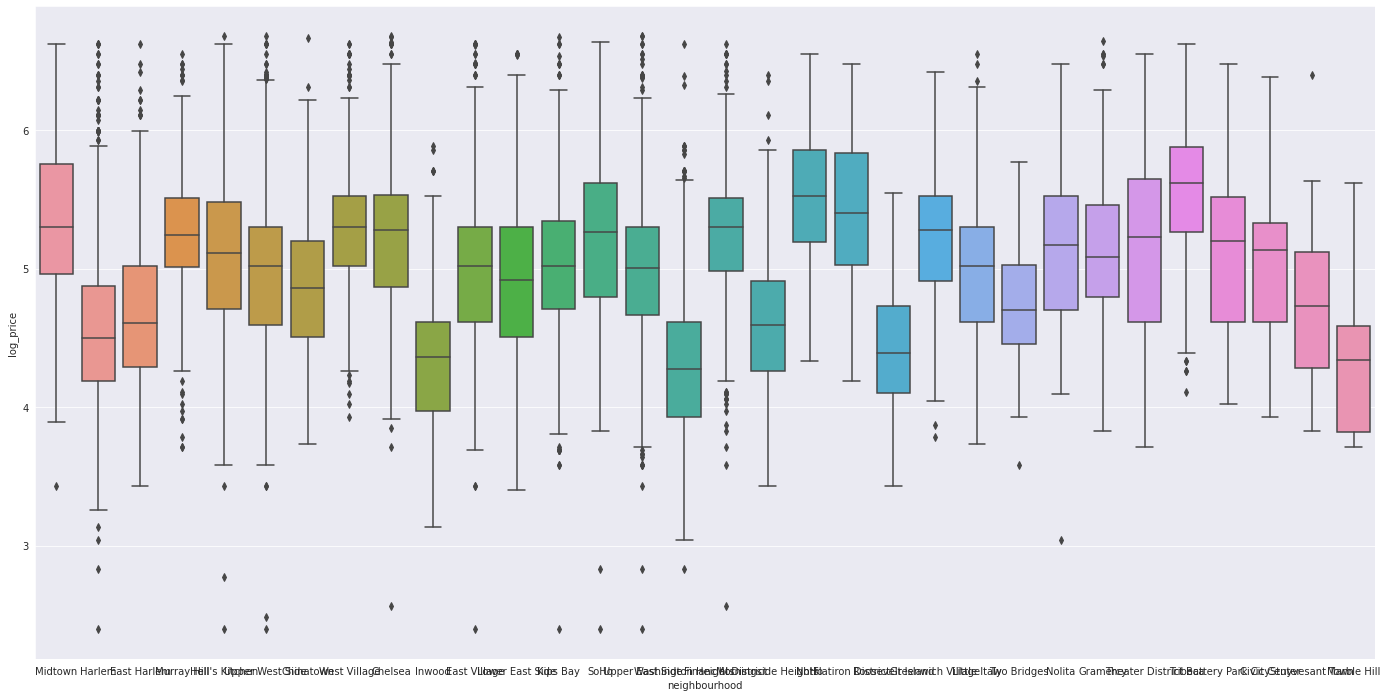

In [39]:
plt.figure(figsize=(24,12))
sns.boxplot(data=nhg1_data, y='log_price', x='neighbourhood')

In [40]:
nhg2_data['neighbourhood'].value_counts()

Williamsburg                 3904
Bedford-Stuyvesant           3694
Bushwick                     2458
Crown Heights                1559
Greenpoint                   1112
Flatbush                      618
Clinton Hill                  565
Prospect-Lefferts Gardens     530
Park Slope                    500
East Flatbush                 499
Fort Greene                   486
Sunset Park                   387
Prospect Heights              350
South Slope                   284
Gowanus                       245
Carroll Gardens               231
East New York                 218
Kensington                    175
Boerum Hill                   174
Sheepshead Bay                162
Windsor Terrace               157
Brooklyn Heights              149
Canarsie                      147
Bay Ridge                     138
Borough Park                  136
Cypress Hills                 133
Midwood                       109
Cobble Hill                    97
Downtown Brooklyn              83
Flatlands     

<AxesSubplot:xlabel='neighbourhood', ylabel='log_price'>

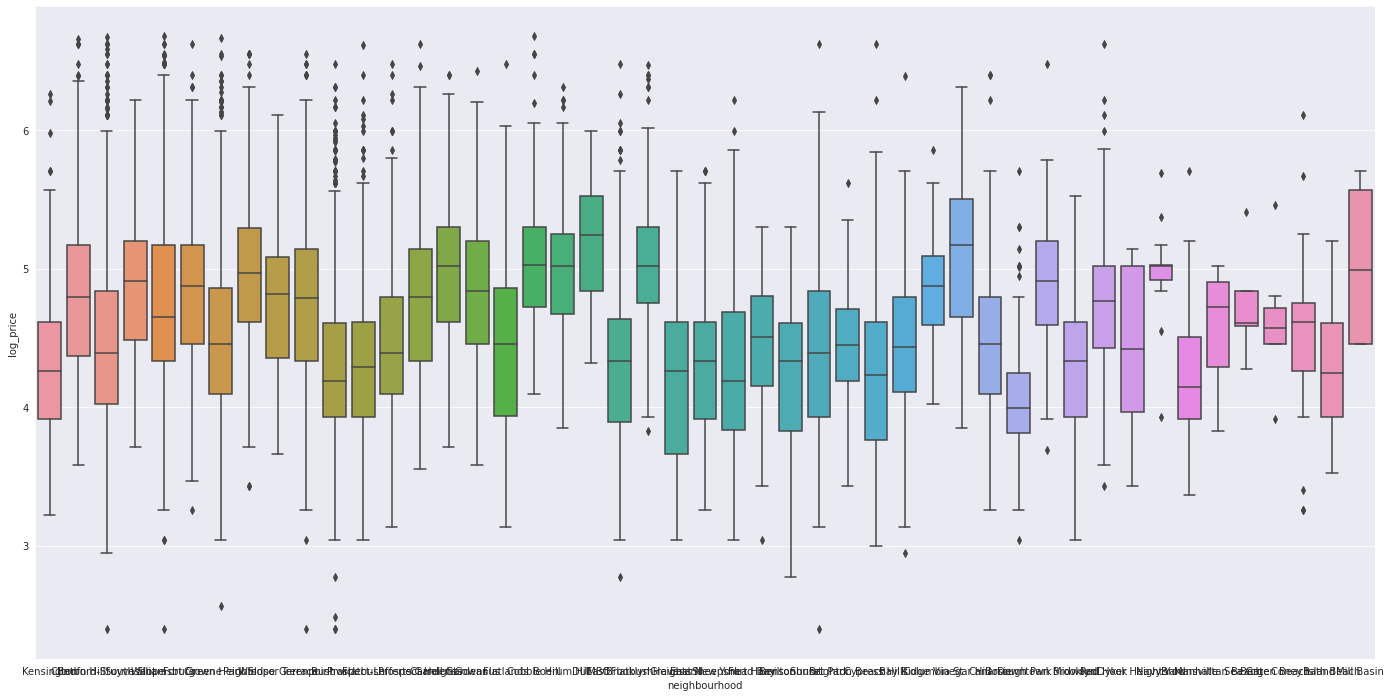

In [41]:
plt.figure(figsize=(24,12))
sns.boxplot(data=nhg2_data, y='log_price', x='neighbourhood')

In [42]:
nhg3_data['neighbourhood'].value_counts()

Astoria                896
Long Island City       535
Flushing               424
Ridgewood              423
Sunnyside              363
Ditmars Steinway       309
Elmhurst               237
Woodside               235
Jamaica                230
Jackson Heights        186
East Elmhurst          185
Forest Hills           142
Maspeth                110
Rego Park              106
Richmond Hill           94
Woodhaven               88
Springfield Gardens     85
St. Albans              76
Arverne                 76
Corona                  64
Ozone Park              62
Queens Village          60
Rosedale                59
Rockaway Beach          56
Briarwood               55
Glendale                54
South Ozone Park        40
Bayside                 38
Fresh Meadows           32
Kew Gardens             32
Middle Village          31
Far Rockaway            27
Cambria Heights         26
Kew Gardens Hills       26
Howard Beach            20
Jamaica Estates         19
College Point           19
L

<AxesSubplot:xlabel='neighbourhood', ylabel='log_price'>

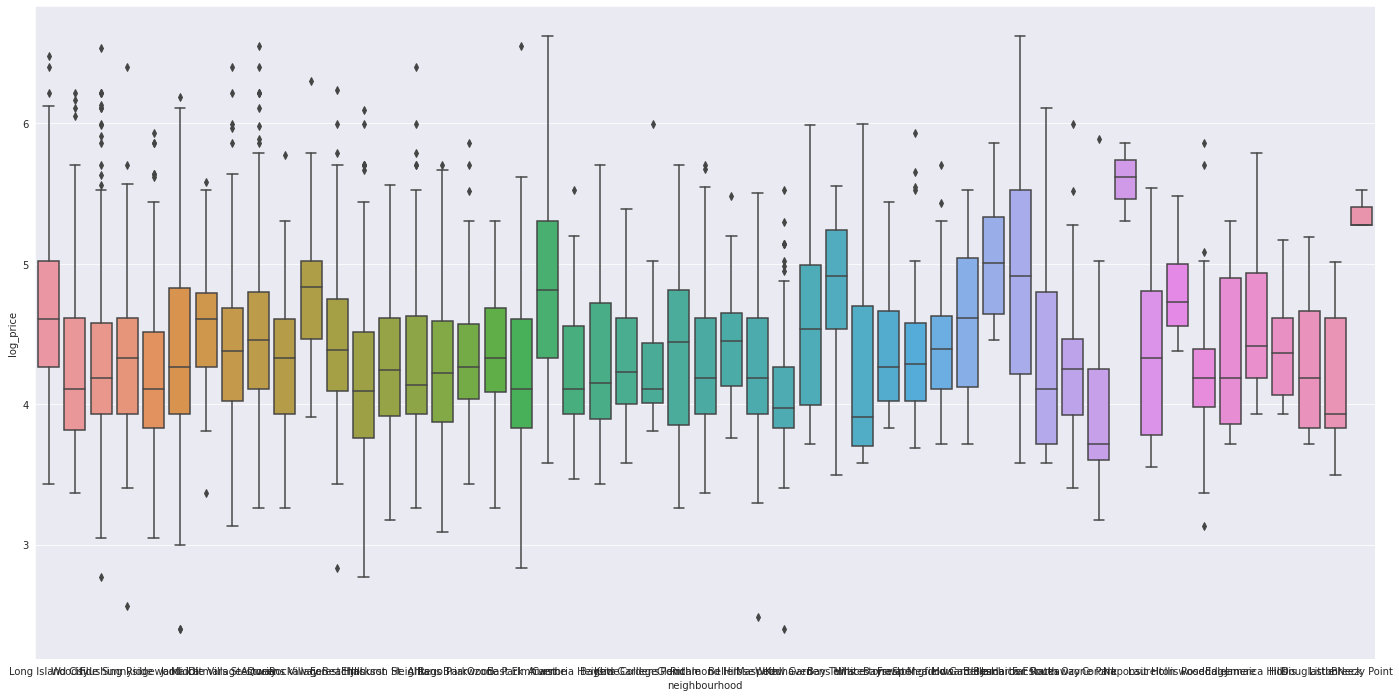

In [43]:
plt.figure(figsize=(24,12))
sns.boxplot(data=nhg3_data, y='log_price', x='neighbourhood')

In [44]:
nhg4_data['neighbourhood'].value_counts()

Kingsbridge           70
Fordham               63
Longwood              62
Mott Haven            60
Concourse             50
Wakefield             50
Port Morris           46
Allerton              42
Williamsbridge        40
Parkchester           39
Concourse Village     32
Norwood               31
Pelham Gardens        28
Claremont Village     28
Highbridge            27
Belmont               24
Throgs Neck           24
Clason Point          21
University Heights    21
Mount Hope            20
Bronxdale             19
Morrisania            18
Hunts Point           18
City Island           17
Morris Heights        17
Pelham Bay            17
Soundview             15
Morris Park           15
Schuylerville         13
Eastchester           13
Edenwald              13
Fieldston             12
Van Nest              11
Tremont               11
Woodlawn              11
North Riverdale       10
Westchester Square    10
Melrose               10
Castle Hill            9
Riverdale              9


<AxesSubplot:xlabel='neighbourhood', ylabel='log_price'>

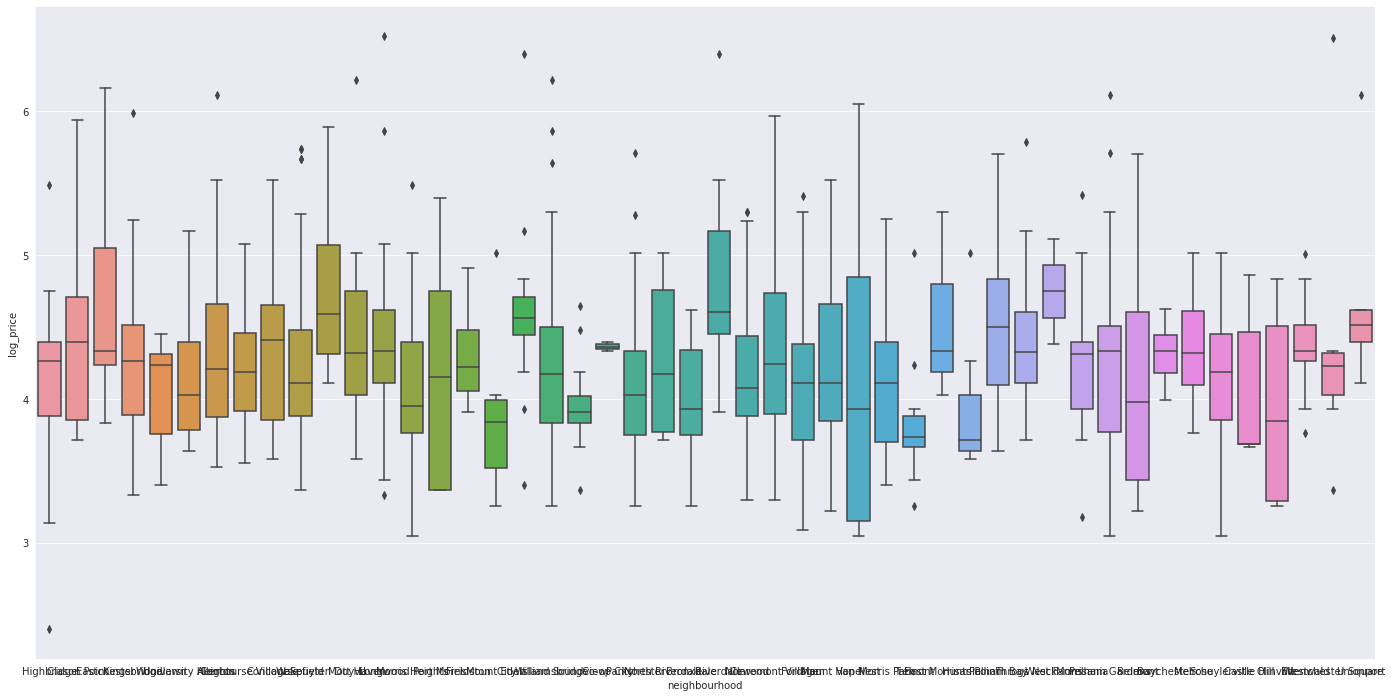

In [45]:
plt.figure(figsize=(24,12))
sns.boxplot(data=nhg4_data, y='log_price', x='neighbourhood')

In [46]:
nhg5_data['neighbourhood'].value_counts()

St. George                    47
Tompkinsville                 42
Stapleton                     27
Concord                       26
Arrochar                      21
West Brighton                 18
Randall Manor                 18
Clifton                       15
Great Kills                   10
Port Richmond                  9
Mariners Harbor                8
New Springville                8
South Beach                    8
Dongan Hills                   7
Rosebank                       7
Shore Acres                    7
Grymes Hill                    7
Tottenville                    7
Midland Beach                  6
Grant City                     6
Bull's Head                    6
Oakwood                        5
New Dorp Beach                 5
Emerson Hill                   5
New Brighton                   5
Arden Heights                  4
Todt Hill                      4
Castleton Corners              4
Prince's Bay                   3
Huguenot                       3
Eltingvill

<AxesSubplot:xlabel='neighbourhood', ylabel='log_price'>

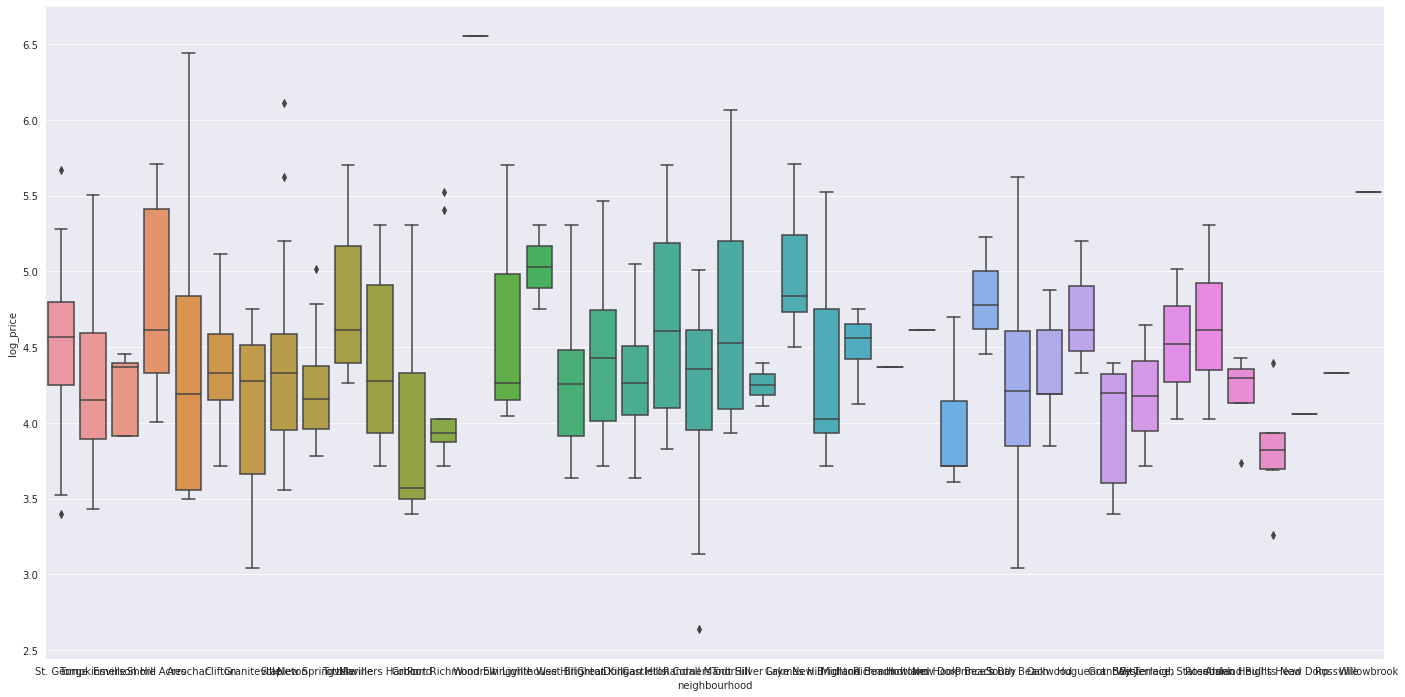

In [47]:
plt.figure(figsize=(24,12))
sns.boxplot(data=nhg5_data, y='log_price', x='neighbourhood')

Для конкретных районов дела обстоят лучше, поэтому попробуем использовать их как фичу. Однако в дальнейшем можно попробовать сгруппировать районы по принципу дороговизны аренды, а не только по территориальной принадлежности. При этом будем держать в голове, что у нас еще есть конкретные координаты объектов.

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48392 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48392 non-null  object 
 1   neighbourhood                   48392 non-null  object 
 2   latitude                        48392 non-null  float64
 3   longitude                       48392 non-null  float64
 4   room_type                       48392 non-null  object 
 5   price                           48392 non-null  int64  
 6   minimum_nights                  48392 non-null  int64  
 7   number_of_reviews               48392 non-null  int64  
 8   last_review                     48392 non-null  object 
 9   reviews_per_month               48392 non-null  float64
 10  calculated_host_listings_count  48392 non-null  int64  
 11  availability_365                48392 non-null  int64  
 12  log_price                       

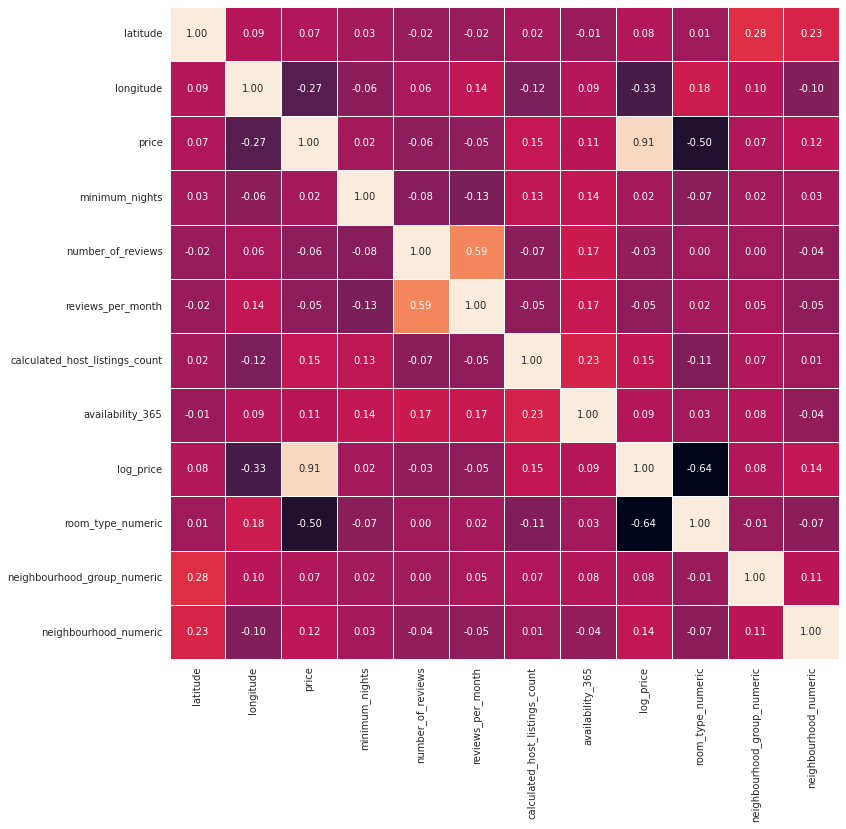

In [49]:
plt.figure(figsize=(12, 12))
sns.heatmap(data.corr(), annot=True, cbar=False, linewidths=.5, fmt= '.2f')
plt.show()

Попробуем построить baseline с имеющимися признаками без каких-либо дальнейших преобразований.

In [50]:
features = ['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 
           'calculated_host_listings_count', 'availability_365', 'room_type_numeric',
           'neighbourhood_group_numeric', 'neighbourhood_numeric']

In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [52]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(data[features], data['price'], \
                                                    test_size=0.30, random_state=42)
scaler1 = StandardScaler()
X_train1 = scaler1.fit_transform(X_train1)
X_test1 = scaler1.transform(X_test1)

baseline_model1 = LinearRegression()
baseline_model1.fit(X_train1, y_train1)
y_pred1 = baseline_model1.predict(X_test1)

print("Test RMSE = %.4f" % mean_squared_error(y_test1, y_pred1, squared=False))
print("Test MAE = %.4f" % mean_absolute_error(y_test1, y_pred1))

print(mean_absolute_error(y_test1, y_pred1)/np.mean(y_test1))

Test RMSE = 84.8571
Test MAE = 53.8771
0.3889517073034126


In [53]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(data[features], data['log_price'], \
                                                    test_size=0.30, random_state=42)
scaler2 = StandardScaler()
X_train2 = scaler2.fit_transform(X_train2)
X_test2 = scaler2.transform(X_test2)

baseline_model2 = LinearRegression()
baseline_model2.fit(X_train2, y_train2)
y_pred2 = baseline_model2.predict(X_test2)

y_pred2_exp = np.expm1(y_pred2)
y_test2_exp = np.expm1(y_test2)

print("Test RMSE = %.4f" % mean_squared_error(y_test2_exp, y_pred2_exp, squared=False))
print("Test MAE = %.4f" % mean_absolute_error(y_test2_exp, y_pred2_exp))

print(mean_absolute_error(y_test2_exp, y_pred2_exp)/np.mean(y_test2_exp))

Test RMSE = 85.7578
Test MAE = 49.2772
0.35574417770395045


Ошибка очень большая, поэтому продолжим пытаться что-то сделать с признаками.

Для начала попробуем каким-то образом преобразовать значения широты и долготы.

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

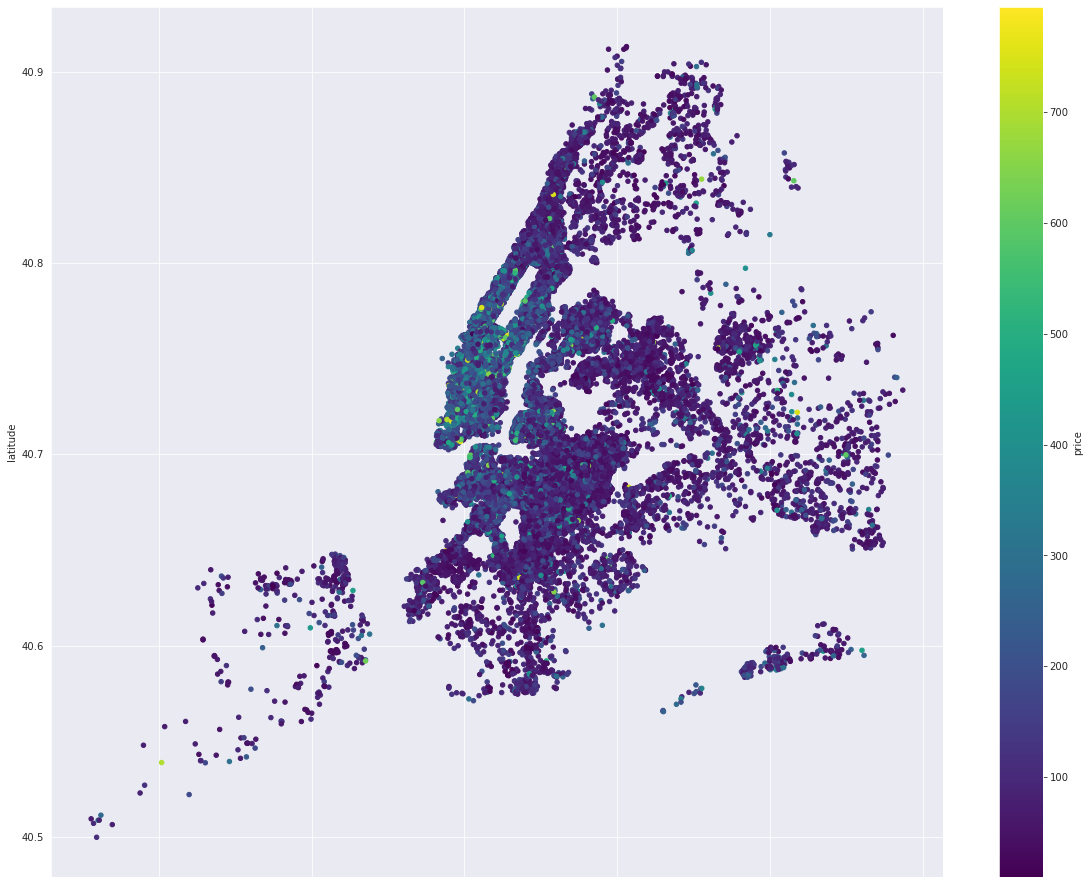

In [54]:
data.plot(kind='scatter', x='longitude', y='latitude', c='price', 
          colormap='viridis', colorbar=True, figsize=(20,16))

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

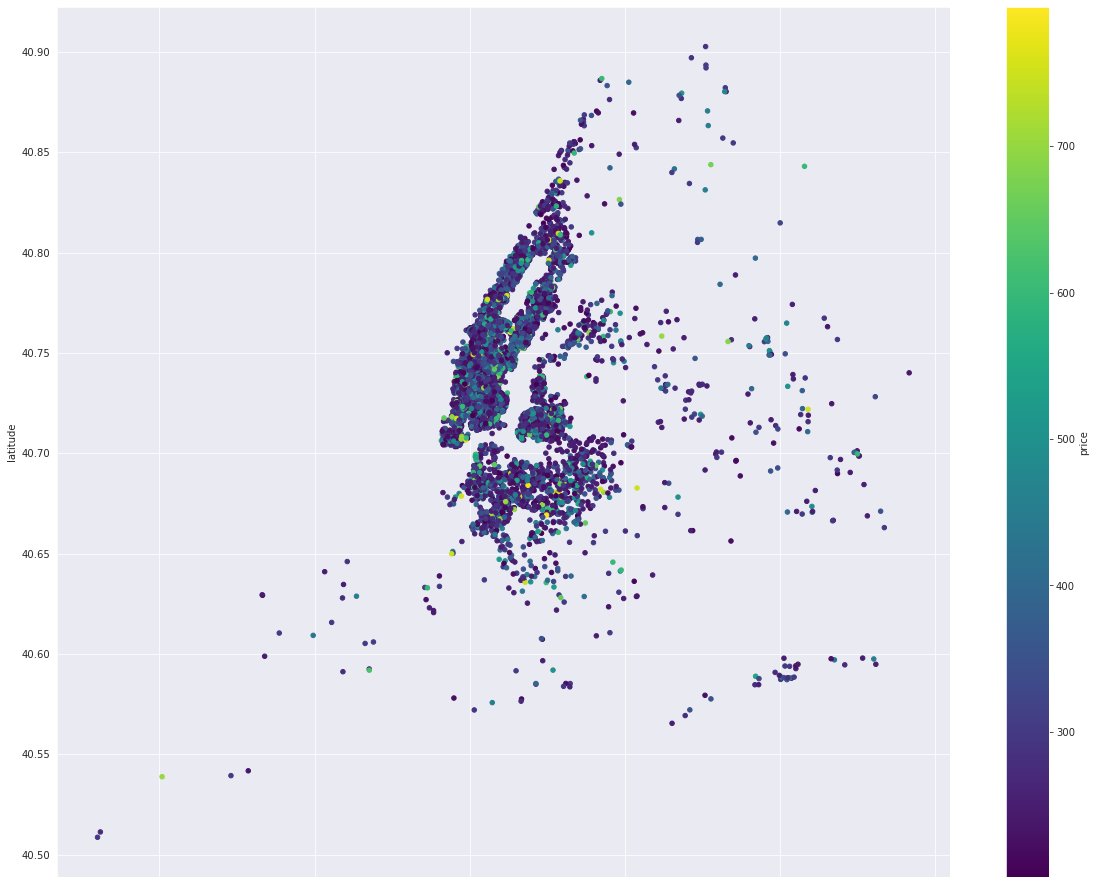

In [55]:
data[data['price'] > 200].plot(kind='scatter', x='longitude', y='latitude', c='price', 
          colormap='viridis', colorbar=True, figsize=(20,16))

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

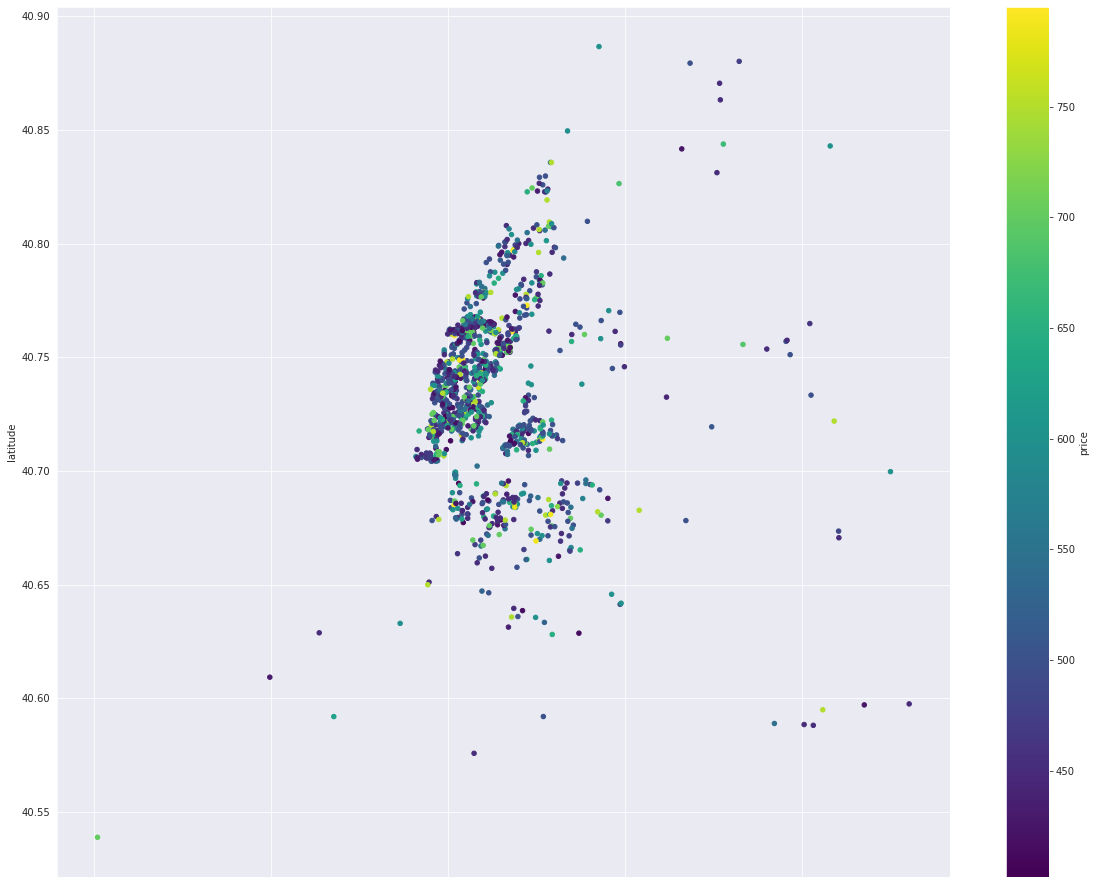

In [56]:
data[data['price'] > 400].plot(kind='scatter', x='longitude', y='latitude', c='price', 
          colormap='viridis', colorbar=True, figsize=(20,16))

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

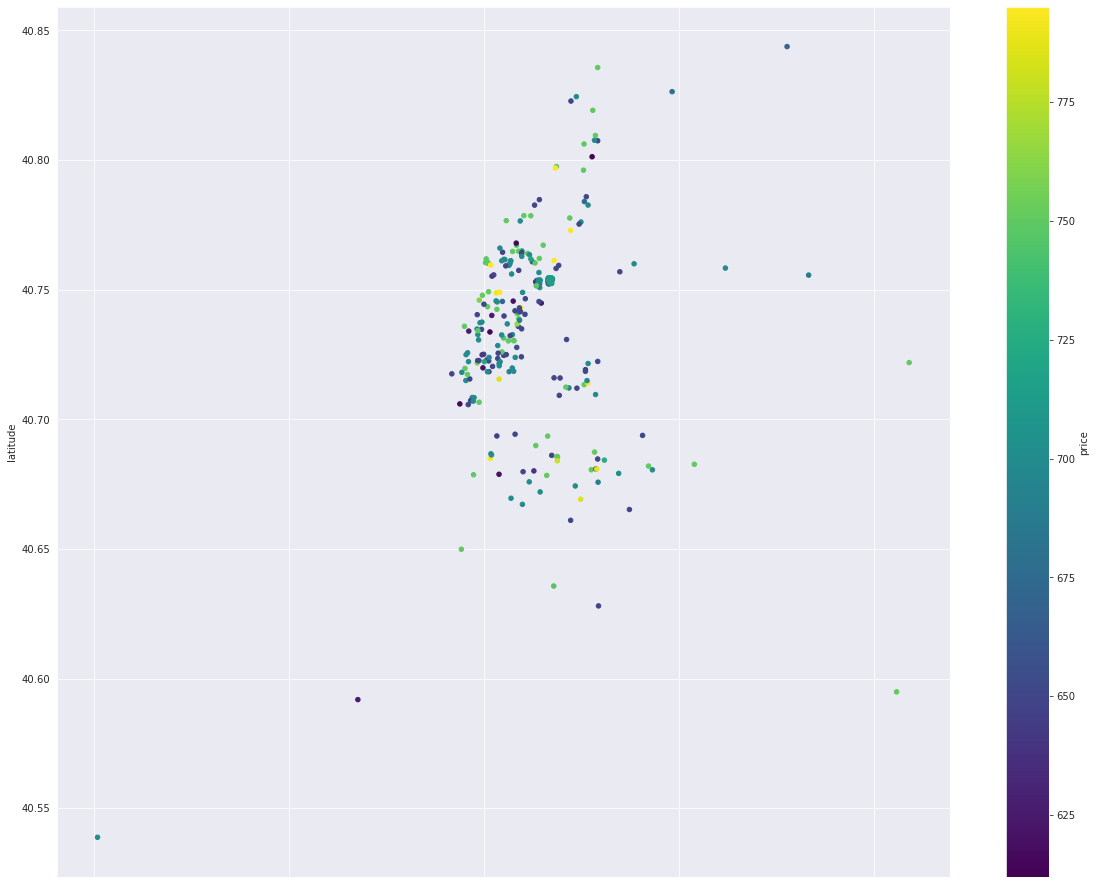

In [57]:
data[data['price'] > 600].plot(kind='scatter', x='longitude', y='latitude', c='price', 
          colormap='viridis', colorbar=True, figsize=(20,16))

Использование широты и долготы на scatterplot практически позволятет построить карту местности. Как видно, наибольшее скопление дорого жилья наблюдается на Манхэттане южнее центрального парка, а также в той части Бруклина, которая граничит с этими районами.

In [58]:
data[(data['price'] > 600) & (data['neighbourhood_group'] == "Manhattan")] \
            .groupby(['neighbourhood'])['neighbourhood'] \
            .count()

neighbourhood
Battery Park City      1
Chelsea               12
Chinatown              1
East Harlem            3
East Village          12
Financial District     8
Flatiron District      1
Gramercy               6
Greenwich Village      1
Harlem                 7
Hell's Kitchen        16
Kips Bay               7
Little Italy           2
Lower East Side        6
Midtown               79
Murray Hill            4
NoHo                   2
Nolita                 2
SoHo                  12
Theater District       7
Tribeca                6
Upper East Side        8
Upper West Side        9
Washington Heights     1
West Village           9
Name: neighbourhood, dtype: int64

Наибольшее количество дорогих вариантов (более 600 долларов) расположено в районе Midtown. Это практически самый центр дорогой части острова.

In [59]:
data[(data['price'] > 600) & (data['neighbourhood'] == "Midtown")]['price'].max()

750

Возьмем за "точку отсчета" не конкретные аппартаменты, а различные достопримечательности, расположенные в районе Midtown: Times Square, Empire State Building и Grand Central Terminal.

In [60]:
ts_latitude = 40.758896
ts_longitude = -73.985130

esb_latitude = 40.748817
esb_longitude = -73.985428

gct_latitude = 40.752655
gct_longitude = -73.977295

In [61]:
def euclidean_distance(df, x, y):
    return df.apply(lambda row: np.linalg.norm(
                            np.array(np.float64(row['latitude']), np.float64(row['longitude'])) - \
                            np.array(np.float64(x), np.float64(y))), 
                    axis=1)

In [62]:
distance_from_ts = euclidean_distance(data, ts_latitude, ts_longitude)
distance_from_ts.corr(data['log_price'])

-0.3001717663938546

In [63]:
distance_from_esb = euclidean_distance(data, esb_latitude, esb_longitude)
distance_from_esb.corr(data['log_price'])

-0.30797993909644367

In [64]:
distance_from_gct = euclidean_distance(data, gct_latitude, gct_longitude)
distance_from_gct.corr(data['log_price'])

-0.3074758686825483

Видим, что корреляции с целевой переменной при рассмотрении дистанции от достопримечательности дает лучшие результаты с Empire State Building. Возьмем такое расстояние в качестве новой фичи.

In [65]:
data['distance_from_esb'] = distance_from_esb

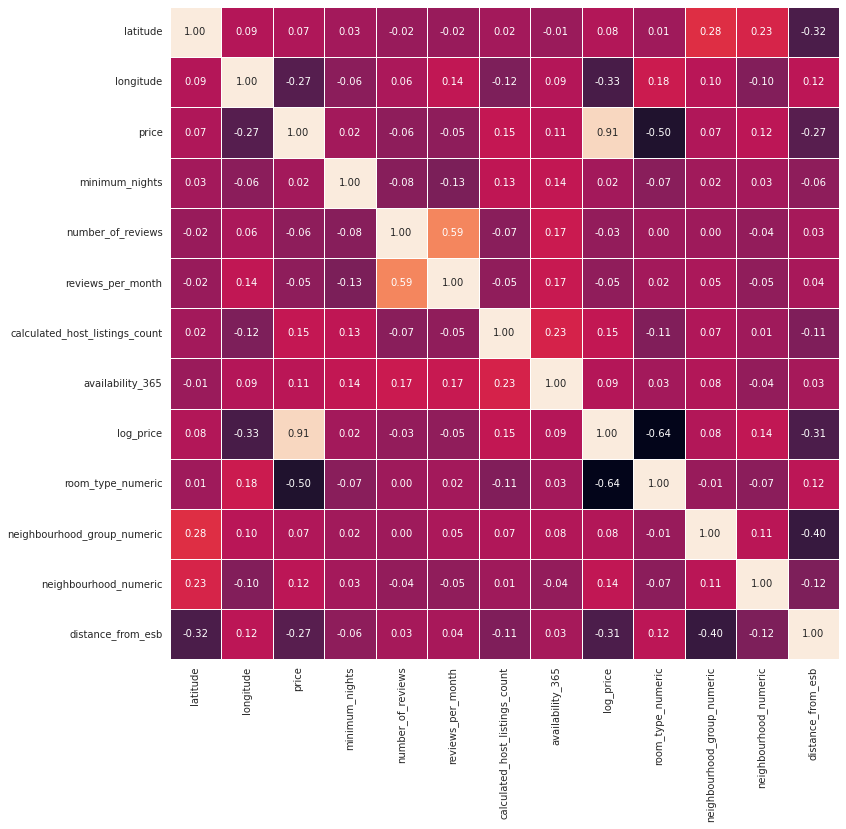

In [66]:
plt.figure(figsize=(12, 12))
sns.heatmap(data.corr(), annot=True, cbar=False, linewidths=.5, fmt= '.2f')
plt.show()

Попробуем обучить модель с новыми фичами.

In [67]:
features = ['latitude', 'longitude', 'distance_from_esb', 
            'minimum_nights', 'number_of_reviews', 'reviews_per_month', 
           'calculated_host_listings_count', 'availability_365', 'room_type_numeric',
           'neighbourhood_group_numeric', 'neighbourhood_numeric']
features

['latitude',
 'longitude',
 'distance_from_esb',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365',
 'room_type_numeric',
 'neighbourhood_group_numeric',
 'neighbourhood_numeric']

In [68]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(data[features], data['log_price'], \
                                                    test_size=0.30, random_state=42)
scaler3 = StandardScaler()
X_train3 = scaler3.fit_transform(X_train3)
X_test3 = scaler3.transform(X_test3)

baseline_model3 = LinearRegression()
baseline_model3.fit(X_train3, y_train3)
y_pred3 = baseline_model3.predict(X_test3)

y_pred3_exp = np.expm1(y_pred3)
y_test3_exp = np.expm1(y_test3)

print("Test RMSE = %.4f" % mean_squared_error(y_test3_exp, y_pred3_exp, squared=False))
print("Test MAE = %.4f" % mean_absolute_error(y_test3_exp, y_pred3_exp))

print(mean_absolute_error(y_test3_exp, y_pred3_exp)/np.mean(y_test3_exp))

Test RMSE = 83.5448
Test MAE = 47.6664
0.3441155752385245


Появление фичи с расстоянием до Empire State Building дало небольшой прирост к качеству.

Попробуем закодировать некоторые признаки через OneHotEncoding.

In [69]:
data = data.join(pd.get_dummies(data[['room_type', 'neighbourhood_group']]))

In [70]:
features = list(data.drop(['price', 'log_price', 'last_review', 
                           'room_type_numeric', 'neighbourhood_group_numeric',
                          'room_type', 'neighbourhood_group', 'neighbourhood'], axis=1))
features

['latitude',
 'longitude',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365',
 'neighbourhood_numeric',
 'distance_from_esb',
 'room_type_Entire home/apt',
 'room_type_Private room',
 'room_type_Shared room',
 'neighbourhood_group_Bronx',
 'neighbourhood_group_Brooklyn',
 'neighbourhood_group_Manhattan',
 'neighbourhood_group_Queens',
 'neighbourhood_group_Staten Island']

In [72]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(data[features], data['log_price'], \
                                                    test_size=0.30, random_state=42)
scaler4 = StandardScaler()
X_train4 = scaler4.fit_transform(X_train4)
X_test4 = scaler4.transform(X_test4)

baseline_model4 = LinearRegression()
baseline_model4.fit(X_train4, y_train4)
y_pred4 = baseline_model4.predict(X_test4)

y_pred4_exp = np.expm1(y_pred4)
y_test4_exp = np.expm1(y_test4)

print("Test RMSE = %.4f" % mean_squared_error(y_test4_exp, y_pred4_exp, squared=False))
print("Test MAE = %.4f" % mean_absolute_error(y_test4_exp, y_pred4_exp))

print(mean_absolute_error(y_test4_exp, y_pred4_exp)/np.mean(y_test4_exp))

Test RMSE = 82.6282
Test MAE = 47.2485
0.34109810834461834


Кодирование через OneHotEncoding дало небольшой прирост. 

Попробуем использовать регуляризацию. На тех же выборках, что и в эксперименте №4 (с добавлением OneHotEncoding).

In [73]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [75]:
X_train, X_test, y_train, y_test = train_test_split(data[features], data['log_price'], \
                                                    test_size=0.30, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

LinearRegression test RMSE = 82.6282
LinearRegression test MAE = 47.2485


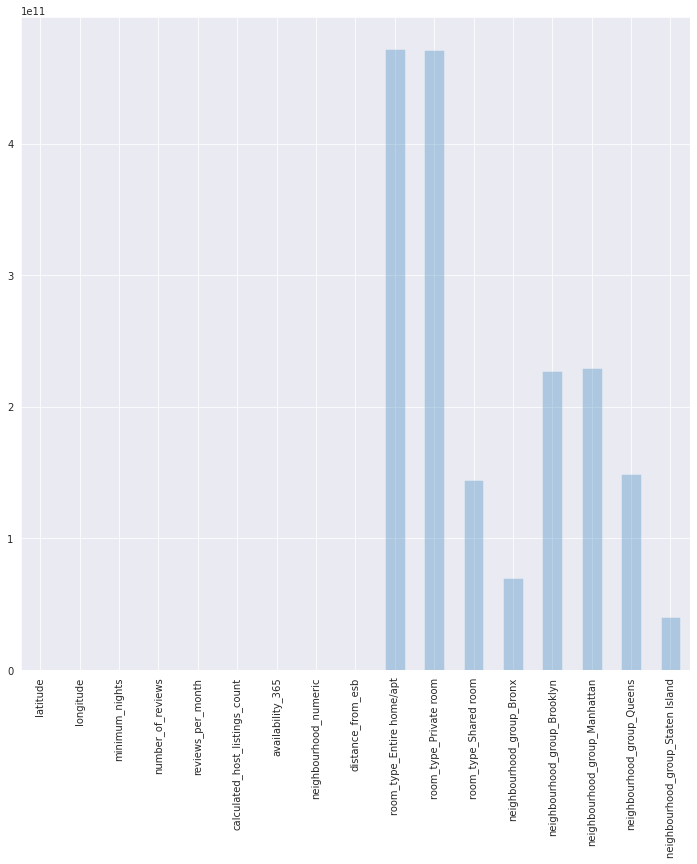

In [112]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

y_pred_exp = np.expm1(y_pred)
y_test_exp = np.expm1(y_test)

print("LinearRegression test RMSE = %.4f" % mean_squared_error(y_test_exp, y_pred_exp, squared=False))
print("LinearRegression test MAE = %.4f" % mean_absolute_error(y_test_exp, y_pred_exp))

lr_feature_importance = pd.Series(dict(zip(features, lr_model.coef_)))
plt.figure(figsize=(12, 12))
lr_feature_importance.plot(kind='bar', alpha=0.3)
plt.show()

RidgeRegression test RMSE = 82.6539
RidgeRegression test MAE = 47.2361


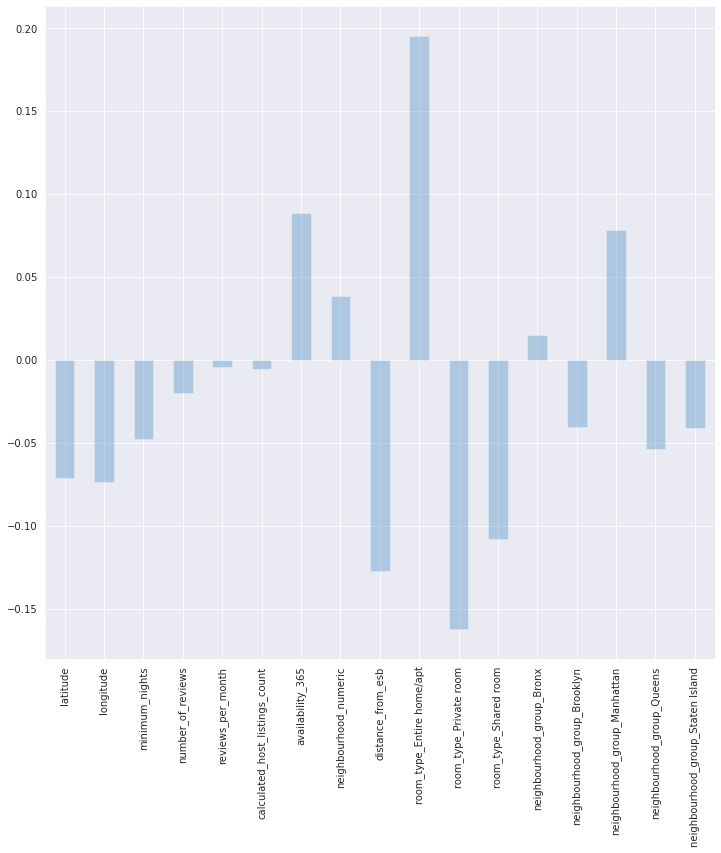

In [113]:
rr_model = Ridge(alpha = 100)
rr_model.fit(X_train, y_train)
y_pred = rr_model.predict(X_test)

y_pred_exp = np.expm1(y_pred)
y_test_exp = np.expm1(y_test)

print("RidgeRegression test RMSE = %.4f" % mean_squared_error(y_test_exp, y_pred_exp, squared=False))
print("RidgeRegression test MAE = %.4f" % mean_absolute_error(y_test_exp, y_pred_exp))

rr_feature_importance = pd.Series(dict(zip(features, rr_model.coef_)))
plt.figure(figsize=(12, 12))
rr_feature_importance.plot(kind='bar', alpha=0.3)
plt.show()

LassoRegression test RMSE = 82.9940
LassoRegression test MAE = 47.2042


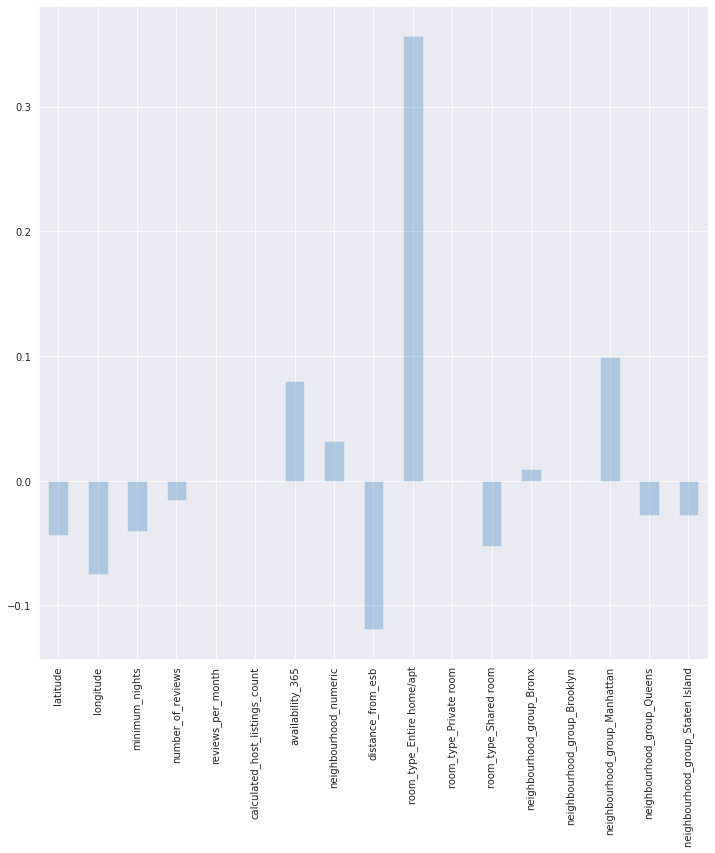

In [124]:
lasr_model = Lasso(alpha = 0.005)
lasr_model.fit(X_train, y_train)
y_pred = lasr_model.predict(X_test)

y_pred_exp = np.expm1(y_pred)
y_test_exp = np.expm1(y_test)

print("LassoRegression test RMSE = %.4f" % mean_squared_error(y_test_exp, y_pred_exp, squared=False))
print("LassoRegression test MAE = %.4f" % mean_absolute_error(y_test_exp, y_pred_exp))

lasr_feature_importance = pd.Series(dict(zip(features, lasr_model.coef_)))
plt.figure(figsize=(12, 12))
lasr_feature_importance.plot(kind='bar', alpha=0.3)
plt.show()

ElasticNetRegression test RMSE = 83.7265
ElasticNetRegression test MAE = 47.3167


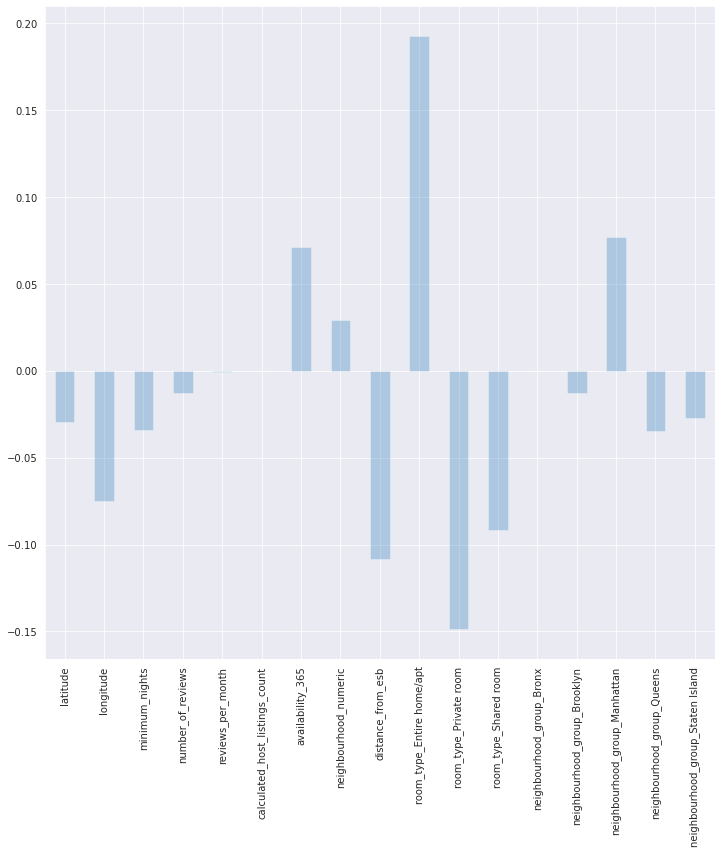

In [126]:
enr_model = ElasticNet(alpha = 0.1,  l1_ratio= 0.05)
enr_model.fit(X_train, y_train)
y_pred = enr_model.predict(X_test)

y_pred_exp = np.expm1(y_pred)
y_test_exp = np.expm1(y_test)

print("ElasticNetRegression test RMSE = %.4f" % mean_squared_error(y_test_exp, y_pred_exp, squared=False))
print("ElasticNetRegression test MAE = %.4f" % mean_absolute_error(y_test_exp, y_pred_exp))

enr_feature_importance = pd.Series(dict(zip(features, enr_model.coef_)))
plt.figure(figsize=(12, 12))
enr_feature_importance.plot(kind='bar', alpha=0.3)
plt.show()

По barplot важности признаков каждой из моделей можно утвреждать, что обычная линейная регрессия практически занулила важность практически половины признаков.

Ridge-регрессия постаралась более равномерное "размазать" важность признаков.

Lasso-регрессия наоборот отсекла часть признаков.

ElasticNet как и ожидалось является чем-то средним между Ridge и Lasso.

В целом, модели дают весьма схожий результат. Однако, гиперпараметры регуляризации можно потюнить и, возможно, это даст небольшой прирост.